In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

In [2]:
# tfds.load returns a tf.data.Dataset object and a tf.core.DatasetInfo object. The latter contains info about how the set is split 
# into test and train, number of examples and names of features
dataset, metadata = tfds.load('cifar10', as_supervised=True, with_info=True) 
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
# Size of training and test sets
train_size = metadata.splits['train'].num_examples
test_size = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(train_size))
print("Number of test examples:     {}".format(test_size))
# Normalise data
def minmaxScaling(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return images, labels

train_dataset = train_dataset.map(minmaxScaling)
test_dataset = test_dataset.map(minmaxScaling)

Number of training examples: 50000
Number of test examples:     10000


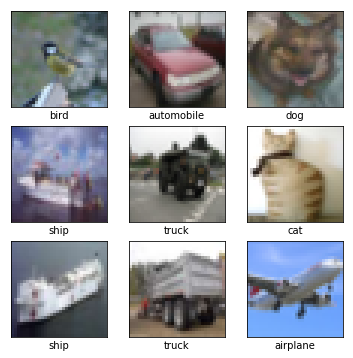

In [5]:
# Human readable labels for the classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
               'horse', 'ship', 'truck']
# Print example and its predicted class
plt.figure(figsize=(6,6))
i = 0
for (image, label) in test_dataset.take(9):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(3,3,i+1)
    plt.imshow(image)#, cmap= plt.cm.binary)
    plt.xlabel(class_names[label])
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()

In [6]:
# Model setup
# One dense layer with 128 neurons, output layer with 10 neurons. Poor performance (~.40). 
#Adding more hidden layers does not improve the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=([32,32,3])),
    tf.keras.layers.Dense(units=256, input_shape=([3072]), activation=('relu')),
    tf.keras.layers.Dense(units=128, activation=('relu')),
    tf.keras.layers.Dense(units=10, activation=('softmax'))
])
# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])

In [7]:
# Shuffling and splitting of training set 
BATCH_SIZE = 64
train_dataset = train_dataset.repeat().shuffle(train_size).batch(BATCH_SIZE)
test_dataset_batched = test_dataset.batch(BATCH_SIZE)

In [8]:
# Training model
model.fit(train_dataset, epochs=3, verbose=True, steps_per_epoch=np.ceil(train_size/BATCH_SIZE))

Epoch 1/3
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


782/782 [==============================] - 45s 57ms/step - loss: 1.8622 - accuracy: 0.3260
Epoch 2/3
782/782 [==============================] - 34s 43ms/step - loss: 1.6765 - accuracy: 0.3995
Epoch 3/3
782/782 [==============================] - 32s 41ms/step - loss: 1.5966 - accuracy: 0.4306


In [9]:
# Predictions
test_loss, test_acc = model.evaluate(test_dataset_batched, steps=np.ceil(test_size/BATCH_SIZE))
predictions = model.predict(test_dataset_batched)

157/157 [==============================] - 5s 32ms/step - loss: 1.6352 - accuracy: 0.4187


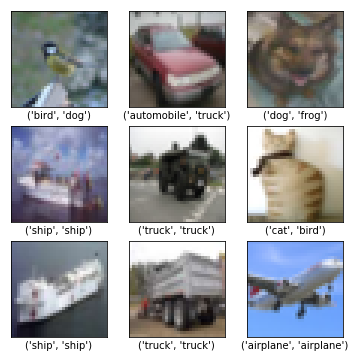

In [10]:
# Print example and its predicted class
plt.figure(figsize=(6,6))
i = 0
for (image, label) in test_dataset.take(9):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(3,3,i+1)
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel((class_names[label], class_names[predictions[i].argmax()]))#
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()

In [11]:
print(predictions)

[[0.02501628 0.01184313 0.15229288 ... 0.00765862 0.10961053 0.00528658]
 [0.02667451 0.19015843 0.01154539 ... 0.03273407 0.26120824 0.31754836]
 [0.03326583 0.02106982 0.12330337 ... 0.02262446 0.02447499 0.03909772]
 ...
 [0.07051107 0.20004894 0.06914415 ... 0.3388265  0.01965557 0.02845938]
 [0.01293028 0.00214318 0.22685319 ... 0.07173576 0.00363251 0.00186617]
 [0.0063479  0.20322818 0.06869718 ... 0.0160429  0.00378787 0.6014655 ]]
